In [13]:
#Import the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import datasets 
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  

import warnings 
warnings.filterwarnings('ignore')

# Import the data.
reviews = pd.read_csv('turtle_reviews.csv')

# View the output.
print(reviews.info())
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [14]:
# Determine the number of null values.
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [15]:
# Determine descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [16]:
# Remove redundant columns.
reviews = reviews.drop(['language', 'platform'], axis=1)
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [17]:
# Change column heading names for better understanding.
reviews = reviews.rename(columns={'remuneration (k£)' : 'renumeration', 'spending_score (1-100)' : 'spending_score'})
reviews.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [18]:
# Save a copy of the cleaned file.
reviews.to_csv('clean_reviews.csv', index=False)

In [19]:
# Sense-check the cleaned data.
clean_reviews = pd.read_csv('clean_reviews.csv')
print(clean_reviews.info())
clean_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [20]:
# Specify the independent variables.
X = clean_reviews[['age', 'renumeration', 'spending_score']]

# Specify the dependent variable.
y = clean_reviews['loyalty_points']

# Fit and train the multiple linear regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

# Call the predictions for X (array).
mlr.predict(X)

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [21]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

R-squared:  0.8399114912748795
Intercept:  -2203.059751307901
Coefficients:


[('age', 11.060658711843349),
 ('renumeration', 34.00838549260249),
 ('spending_score', 34.18319657763366)]

## 4. Training and testing subsets with MLR

In [22]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [23]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     2692.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:51:37   Log-Likelihood:                -12227.
No. Observations:                1600   AIC:                         2.446e+04
Df Residuals:                    1596   BIC:                         2.448e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.3411     58.253    -37.

In [24]:
print(mlr.score(X_train, Y_train)*100)

83.4723217743655


## 5. Run a regression test

In [25]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(X_train, Y_train)

LinearRegression()

In [26]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [ 1362.93474067   767.56846704  2292.11541031 ...  1416.57825601
 -1096.31139624  1531.78396384]


In [27]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

85.3050388163067


# 6. Check for multicollinearity

In [28]:
# Check multicollinearity.
x_temp = sm.add_constant(X_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0        21.3           const
1         1.1             age
2         1.0    renumeration
3         1.1  spending_score


In [29]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [30]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 30.386096853867883, 'LM Test p-value': 1.1446326520923542e-06, 'F-stat': 10.298968105376614, 'F-test p-value': 1.026336544830792e-06}


In [31]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 425.48679627595675
Mean Square Error (Final): 301956.0390785325


In [32]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [33]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [ 1362.93474067   767.56846704  2292.11541031 ...  1416.57825601
 -1096.31139624  1531.78396384]


In [34]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [ 1.39464002e+03  3.42722127e+03  1.64827702e+03  1.73471263e+03
  8.78436414e+02  1.10385877e+03  3.37583217e+03  1.17368074e+03
  3.24736342e+03  2.23180070e+03 -2.44944699e+02  4.10358129e+02
  2.12783527e+02  9.63165267e+02  1.28320189e+03  1.77257837e+03
 -1.43799603e+02  1.63483668e+03  3.18353398e+03  2.04590612e+03
  1.60641528e+03  2.11803797e+03  1.46031816e+03 -7.21777196e+02
  4.39477305e+03  2.96179966e+03  3.42723600e+03  1.34009235e+03
 -4.44661239e+02  1.33626775e+03  1.41790286e+03  4.58138911e+03
  1.29316633e+03  3.83420234e+03  1.27602323e+03  1.88201997e+03
  5.94541904e+01  4.00594554e+02  2.19418054e+03  6.28463350e+02
  1.50093432e+03  8.28366550e+02  1.08041516e+03  1.63483668e+03
 -8.60817496e+02  1.34238749e+03  1.10249534e+03  1.42146714e+03
 -9.54686183e+02  1.92394653e+03  1.37765359e+03 -8.54393252e+02
  2.97230292e+03  1.65861425e+03 -2.56101162e+02  1.57640549e+03
  1.50963897e+03  1.36293474e+03  1.40406027e+03  3.96782965e+03


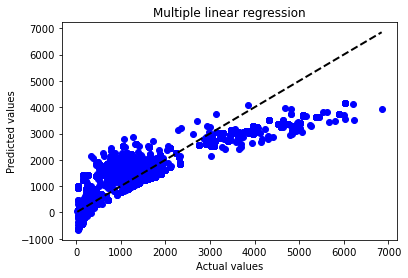

In [35]:
# Fit the OLS model using the input and output variables
model = sm.OLS(y, X).fit()

# Generate predicted values from the model
y_pred = model.predict(X)

# Create a scatter plot of the predicted values and actual values
plt.scatter(y, y_pred, color='blue')

# Add a diagonal line to the plot
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

# Add labels and title to the plot
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Multiple linear regression')

# Show the plot
plt.show()
